<a href="https://colab.research.google.com/github/AlexKressner/Statistik/blob/main/Wahrscheinlichkeitsrechnung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
number_of_trials = 100000
heads = 0
tails = 0
ratio = []
p = 0.5

In [4]:
for trial in range(1,number_of_trials+1):
  result = bernoulli.rvs(p)
  if result == 1:
    heads +=1
  else:
    tails +=1
  ratio.append([trial,heads/trial])

In [5]:
heads, tails

(49747, 50253)

In [6]:
y = [point[1] for point in ratio]
x = [point[0] for point in ratio]

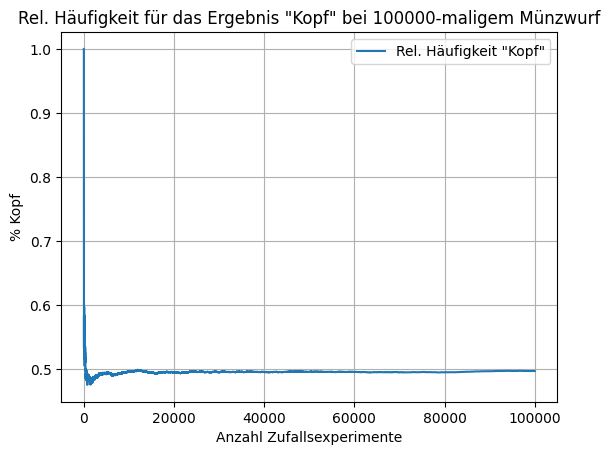

In [7]:
# Plot the line
plt.plot(x, y, label='Rel. Häufigkeit "Kopf"')

# Add title and labels to the axes
plt.title(f'Rel. Häufigkeit für das Ergebnis "Kopf" bei {number_of_trials}-maligem Münzwurf')
plt.xlabel("Anzahl Zufallsexperimente")
plt.ylabel("% Kopf")

# Display the legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

## Anzahl der Stichproben und Fehlerwahrscheinlichkeit

In [8]:
trials = range(0,79)

In [9]:
p = []
prob=[]
for trial in trials:
  p.append((68-trial)/(80-trial))
  prob.append([trial+1,np.prod(p)])

In [12]:
x = pd.DataFrame(prob, columns=["Trial","Irrtumswahrscheinlichkeit"])
x

,Trial,Irrtumswahrscheinlichkeit
0,1,0.850000
1,2,0.720886
2,3,0.609981
3,4,0.514919
4,5,0.433616
...,...,...
74,75,0.000000
75,76,-0.000000
76,77,0.000000
77,78,-0.000000


<Axes: xlabel='Trial'>

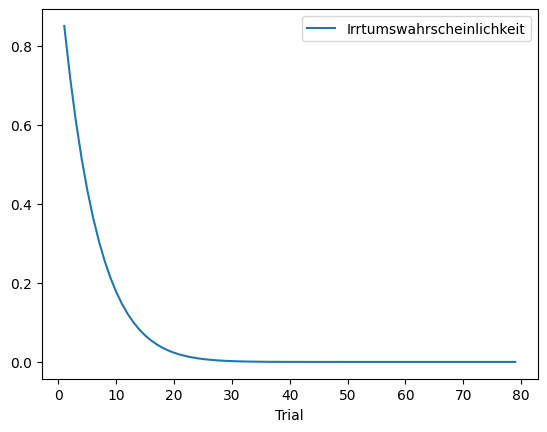

In [14]:
x.plot(x="Trial", y="Irrtumswahrscheinlichkeit", kind="line")